In [1]:
import matplotlib.pyplot as plt
import time
from mesa.batchrunner import batch_run
import pandas as pd
import numpy as np
%matplotlib inline

from model2 import SchellingModel


C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#IL MODELLO, PER COME EFFETTUA LO STEP, CONSIDERA IL NEIGH ASSOLUTO => SE UN AGENTE è SOLO (NON HA NEIGH DI NESSUN TIPO) ALLORA è CONSIDERATO COME NON SODDISFATTO

TESTARE IL NEIGH RELATIVO

Now we instantiate a model instance: a 10x10 grid, with an 80% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 30% similar neighbors.

In [2]:
#["pure_random","mild_random","min_gain","max_gain"]
#neighborhood_type = "abs"/"rel"
model = SchellingModel(15, 0.7, 0.3, 0.3, "max_gain", neighborhood_type="abs", verbose = 0, skip_if_not_happy = True)
# side =10, density=0.7, minority_pc=0.3, homophily=0.3, verbose
#minority: 0 = all blue, 1 = all red
#cell type: 1 = red, 2 = blue 

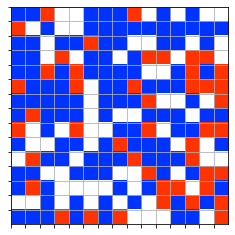

In [3]:
model.show()

We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will ever settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

In [4]:
start = time.time()
while model.running and model.schedule.steps < 200: #blu = 2, red = 1
    model.step()
end = time.time()
print("Steps before stop condition")
print(model.schedule.steps) # Show how many steps have actually run

print("time elapsed")
print(end-start)

Steps before stop condition
5
time elapsed
1.9653923511505127


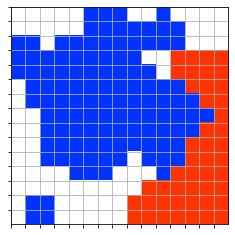

In [5]:
model.show()

In [25]:
model.schedule.steps

3

In [23]:
model.schedule._agents[8].pos

(2, 2)

In [22]:
model.schedule._agents[8].segregation

0.25

In [8]:
model.schedule._agents[0].type

2

In [6]:
#for each iter, compute and store the user def fun for the whole agents set
r = model.datacollector.get_model_vars_dataframe()
r

,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time
0,0.67500,0.628906,1.703380,0.000000
1,0.97500,0.744531,0.160904,0.000000
2,0.98750,0.770312,0.070078,0.000000
3,0.99375,0.775781,0.029967,0.000000
4,1.00000,0.778125,0.000000,1.965392


<AxesSubplot:>

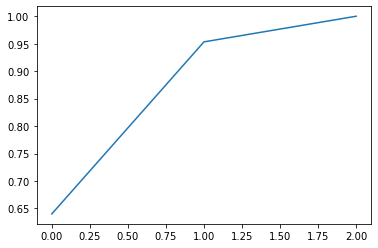

In [9]:
r['perc_happy'].plot()

<AxesSubplot:>

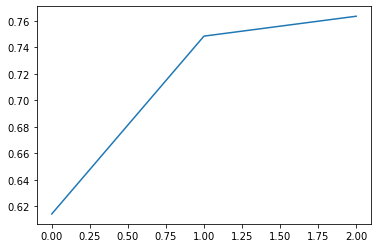

In [10]:
r['tot_seg'].plot()

<AxesSubplot:>

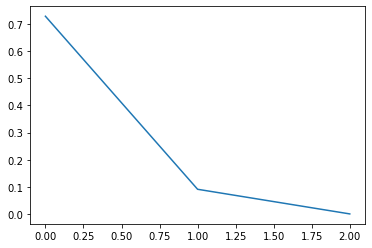

In [11]:
r['elapsed_step_time'].plot()

In [12]:
#for each iter, compute and store the user def fun for each agent
r1 = model.datacollector.get_agent_vars_dataframe()
r1

x  y  segregation
Step AgentID                    
1    0         6  7        0.375
     1        12  1        0.750
     2         0  5        0.500
     3         0  6        0.500
     4         0  9        0.375
...           .. ..          ...
3    145      13  2        1.000
     146      13  6        0.875
     147       9  3        0.875
     148       1  7        0.750
     149      11  8        1.000

[450 rows x 3 columns]

<AxesSubplot:xlabel='Step,AgentID'>

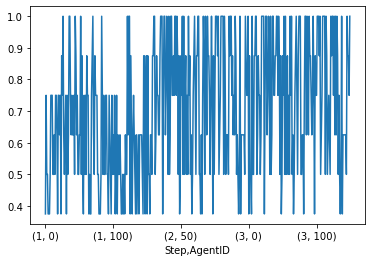

In [13]:
r1['segregation'].plot()

BATCH RUN

In [7]:
#parameters = {"side": [8,10,12,14,16,18,20], "density": [0.2, 0.4, 0.6, 0.8], "minority_pc": [0.2, 0.4, 0.6, 0.8], 
#              "homophily": [0.2, 0.4, 0.6, 0.8], "relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
#              "neighborhood_type":["abs","rel"], "skip_if_not_happy":True}

parameters = {"side": [5,10,15],"homophily": [0.2,0.4,0.6,0.8], "relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "neighborhood_type":["abs","rel"], "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████| 96/96 [17:17<00:00, 10.81s/it]


In [109]:
homophily_set = [0.2,0.4,0.6,0.8]
side_set = [5,10,15]
relocation_policy_set = ["pure_random","mild_random","max_gain","min_gain"]
neighborhood_type_set = ["abs","rel"]

In [8]:
df = pd.DataFrame(results)
df

,RunId,iteration,Step,side,homophily,relocation_policy,neighborhood_type,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,x,y,segregation
0,3,0,0,5,0.2,mild_random,rel,True,0.944444,0.735185,0.007618,0.000000,NaN,NaN,NaN,NaN
1,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,0.0,0.0,0.0,0.666667
2,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,1.0,0.0,1.0,0.800000
3,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,2.0,0.0,2.0,0.800000
4,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,3.0,0.0,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710550,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,142.0,14.0,8.0,0.500000
710551,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,143.0,14.0,9.0,0.750000
710552,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,144.0,14.0,11.0,0.500000
710553,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,145.0,14.0,12.0,0.750000


In [21]:
df.to_csv('df_computed',index=False)

<AxesSubplot:>

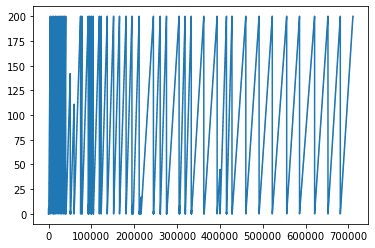

In [9]:
df.Step.plot()

<AxesSubplot:>

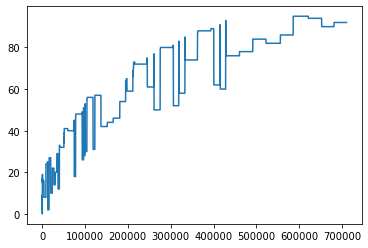

In [10]:
df.RunId.plot()

In [11]:
df2 = df.drop(['skip_if_not_happy', 'x','y','iteration'], axis=1)
df2

,RunId,Step,side,homophily,relocation_policy,neighborhood_type,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,3,0,5,0.2,mild_random,rel,0.944444,0.735185,0.007618,0.000000,NaN,NaN
1,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,0.0,0.666667
2,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,1.0,0.800000
3,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,2.0,0.800000
4,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
710550,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,142.0,0.500000
710551,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,143.0,0.750000
710552,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,144.0,0.500000
710553,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,145.0,0.750000


In [82]:
p1 = df2[(df2["side"]==5) & (df2["homophily"]==0.2) & (df2["neighborhood_type"]=="rel")]
p1
p1[p1["relocation_policy"]=="pure_random"].elapsed_total_time.max()

0.014336824417114258

In [102]:
p2 = df2[(df2["side"]==15) & (df2["neighborhood_type"]=="rel")]
r = p2.groupby(["homophily","relocation_policy"]).max()[["elapsed_step_time"]]
r

elapsed_step_time
homophily relocation_policy                   
0.2       max_gain                    0.370654
          mild_random                 0.519589
          min_gain                    0.859116
          pure_random                 0.010226
0.4       max_gain                    1.694049
          mild_random                 1.670269
          min_gain                    2.088551
          pure_random                 0.008663
0.6       max_gain                    2.155830
          mild_random                 2.588654
          min_gain                    3.604587
          pure_random                 0.010275
0.8       max_gain                    2.710554
          mild_random                 3.579922
          min_gain                    2.619697
          pure_random                 0.012151

In [142]:
p2 = df2[(df2["side"]==15) & (df2["neighborhood_type"]=="rel")]
r = p2.groupby(["homophily","relocation_policy"]).max()[["elapsed_total_time"]]
r

elapsed_total_time
homophily relocation_policy                    
0.2       max_gain                     0.377298
          mild_random                  0.634200
          min_gain                     1.005354
          pure_random                  0.056675
0.4       max_gain                     1.809642
          mild_random                  1.942543
          min_gain                     3.078816
          pure_random                  0.082074
0.6       max_gain                     2.790313
          mild_random                  3.172629
          min_gain                     5.111782
          pure_random                  0.049957
0.8       max_gain                     2.773155
          mild_random                  3.995011
          min_gain                   329.726755
          pure_random                  0.263252

In [133]:
r.loc[0.2].loc["max_gain"].values[0]

0.3706541061401367

[1.2851641178131104, 276.3632595539093, 507.42712211608887, 630.3556976318359]


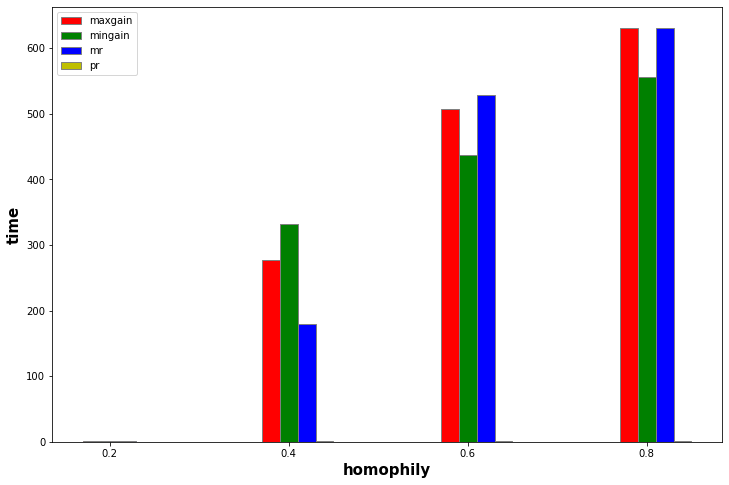

In [150]:
import numpy as np
import matplotlib.pyplot as plt

p2 = df2[(df2["side"]==15) & (df2["neighborhood_type"]=="abs")]
r = p2.groupby(["homophily","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for hom in homophily_set:
    max_gain.append(r.loc[hom].loc["max_gain"].values[0])
    min_gain.append(r.loc[hom].loc["min_gain"].values[0])
    mR.append(r.loc[hom].loc["mild_random"].values[0])
    pr.append(r.loc[hom].loc["pure_random"].values[0])    

print(max_gain)

# Set position of bar on X axis
br1 = np.arange(len(homophily_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		homophily_set)

plt.legend()
plt.show()


[27.56088423728943, 329.41416907310486, 630.3556976318359]


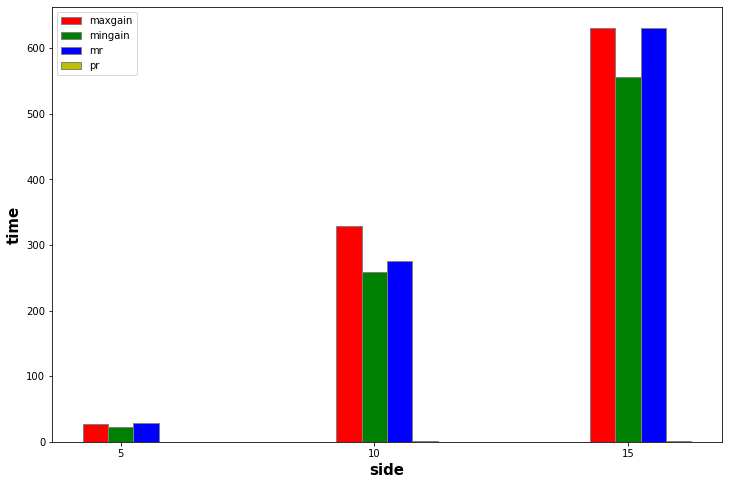

In [149]:
import numpy as np
import matplotlib.pyplot as plt

p2 = df2[(df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]
r = p2.groupby(["side","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for side in side_set:
    max_gain.append(r.loc[side].loc["max_gain"].values[0])
    min_gain.append(r.loc[side].loc["min_gain"].values[0])
    mR.append(r.loc[side].loc["mild_random"].values[0])
    pr.append(r.loc[side].loc["pure_random"].values[0])    

print(max_gain)

# Set position of bar on X axis
br1 = np.arange(len(side_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('side', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		side_set)

plt.legend()
plt.show()


DURING

SIDE CHANGE (HOMOPHILY FIX TO 0.8, NEIGH FIX TO ABS)

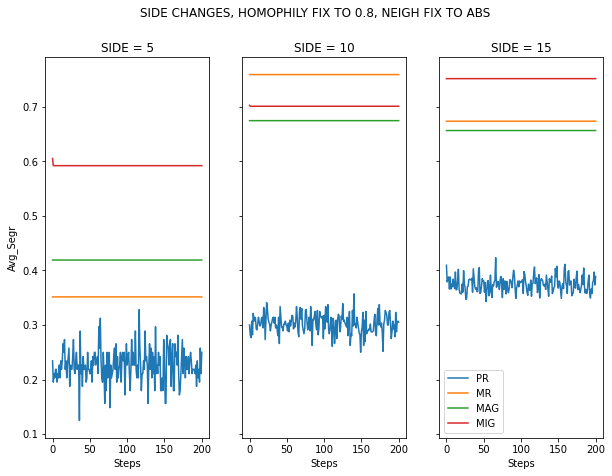

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==5) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax1.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax1.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax1.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==10) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax2.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax2.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax2.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax2.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax3.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax3.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax3.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax3.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax1.set_title('SIDE = 5')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Avg_Segr')

ax2.set_title('SIDE = 10')
ax2.set_xlabel('Steps')

ax3.set_title('SIDE = 15')
ax3.set_xlabel('Steps')

f.suptitle('SIDE CHANGES, HOMOPHILY FIX TO 0.8, NEIGH FIX TO ABS')
plt.legend()

SIDE CHANGES (HOMOPHILY FIX TO 0.8, NEIGH FIX TO REL)

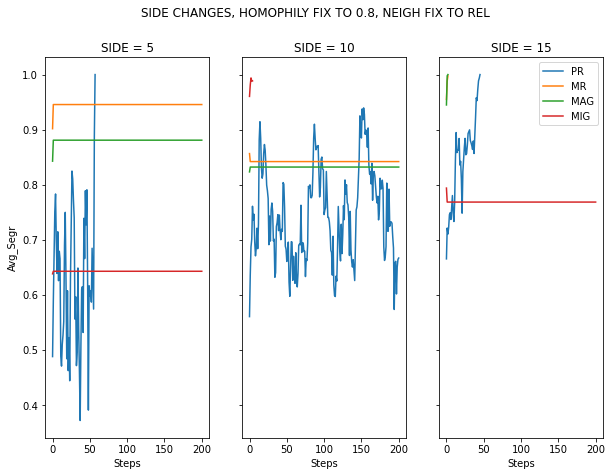

In [61]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==5) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax1.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax1.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax1.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==10) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax2.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax2.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax2.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax2.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax3.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax3.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax3.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax3.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax1.set_title('SIDE = 5')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Avg_Segr')

ax2.set_title('SIDE = 10')
ax2.set_xlabel('Steps')

ax3.set_title('SIDE = 15')
ax3.set_xlabel('Steps')

f.suptitle('SIDE CHANGES, HOMOPHILY FIX TO 0.8, NEIGH FIX TO REL')
plt.legend()

HOMOPHILY CHANGE (FIX SIDE TO 15, NEIGH TO ABS)

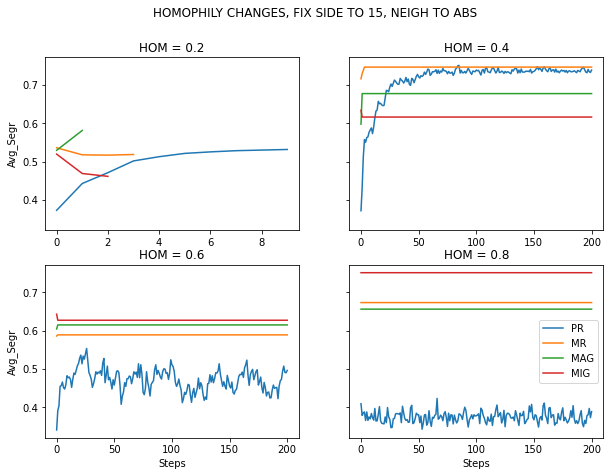

In [64]:
f, ax = plt.subplots(2, 2, figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.2) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.4) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.6) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

############################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax[0,0].set_title('HOM = 0.2')
ax[0,0].set_ylabel('Avg_Segr')

ax[0,1].set_title('HOM = 0.4')


ax[1,0].set_title('HOM = 0.6')
ax[1,0].set_xlabel('Steps')
ax[1,0].set_ylabel('Avg_Segr')

ax[1,1].set_title('HOM = 0.8')
ax[1,1].set_xlabel('Steps')

f.suptitle('HOMOPHILY CHANGES, FIX SIDE TO 15, NEIGH TO ABS')
plt.legend()

In [ ]:
HOMOPHILY CHANGE (FIX SIDE TO 15, NEIGH TO REL)

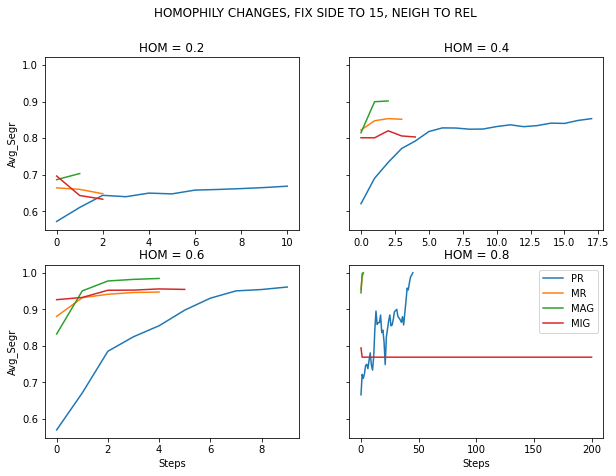

In [65]:
f, ax = plt.subplots(2, 2, figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.2) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.4) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.6) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

############################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax[0,0].set_title('HOM = 0.2')
ax[0,0].set_ylabel('Avg_Segr')

ax[0,1].set_title('HOM = 0.4')


ax[1,0].set_title('HOM = 0.6')
ax[1,0].set_xlabel('Steps')
ax[1,0].set_ylabel('Avg_Segr')

ax[1,1].set_title('HOM = 0.8')
ax[1,1].set_xlabel('Steps')

f.suptitle('HOMOPHILY CHANGES, FIX SIDE TO 15, NEIGH TO REL')
plt.legend()

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.2) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.4) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.6) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

############################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax[0,0].set_title('HOM = 0.2')
ax[0,0].set_ylabel('Avg_Segr')

ax[0,1].set_title('HOM = 0.4')


ax[1,0].set_title('HOM = 0.6')
ax[1,0].set_xlabel('Steps')
ax[1,0].set_ylabel('Avg_Segr')

ax[1,1].set_title('HOM = 0.8')
ax[1,1].set_xlabel('Steps')

f.suptitle('HOMOPHILY CHANGES, FIX SIDE TO 15, NEIGH TO REL')
plt.legend()

FINAL

HOMOPHILY CHANGES, FIX SIDE 

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(10, 7), sharey = True)


p2 = df2[(df2["side"]==15) & (df2["neighborhood_type"]=="rel")]
p2.groupby(["homophily","relocation_policy"]).max()[["elapsed_step_time"]]


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.2) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.4) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.6) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

############################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax[0,0].set_title('HOM = 0.2')
ax[0,0].set_ylabel('Avg_Segr')

ax[0,1].set_title('HOM = 0.4')


ax[1,0].set_title('HOM = 0.6')
ax[1,0].set_xlabel('Steps')
ax[1,0].set_ylabel('Avg_Segr')

ax[1,1].set_title('HOM = 0.8')
ax[1,1].set_xlabel('Steps')

f.suptitle('HOMOPHILY CHANGES, FIX SIDE TO 15, NEIGH TO REL')
plt.legend()

HOMOPHILY

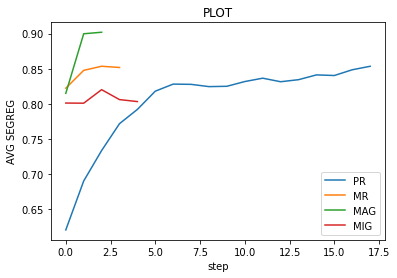

In [26]:
p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.4) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


plt.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
plt.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
plt.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
plt.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

plt.legend(loc='best')
plt.title('PLOT')
plt.ylabel('AVG SEGREG')
plt.xlabel('step')
plt.show()

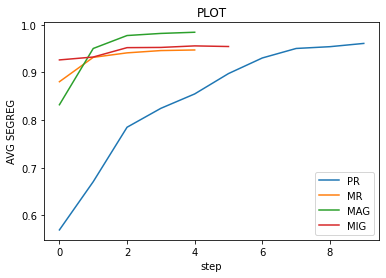

In [29]:
p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.6) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


plt.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
plt.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
plt.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
plt.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

plt.legend(loc='best')
plt.title('PLOT')
plt.ylabel('AVG SEGREG')
plt.xlabel('step')
plt.show()

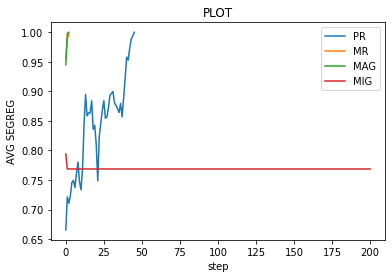

In [30]:
p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


plt.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
plt.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
plt.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
plt.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

plt.legend(loc='best')
plt.title('PLOT')
plt.ylabel('AVG SEGREG')
plt.xlabel('step')
plt.show()

NEIGH TYPE

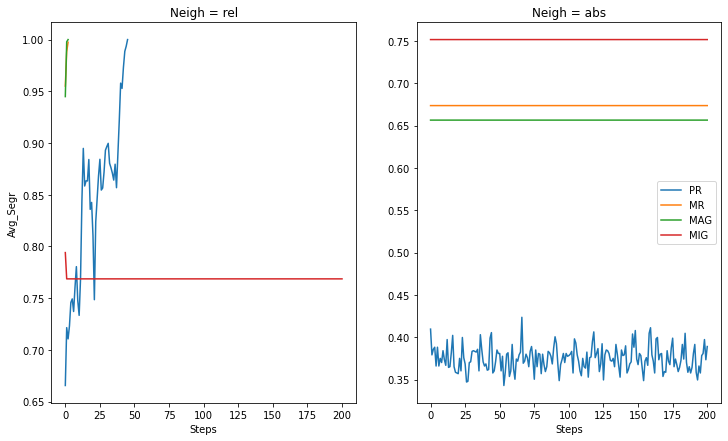

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax1.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax1.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax1.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax2.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax2.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax2.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax2.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

ax1.set_title('Neigh = rel')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Avg_Segr')

ax2.set_title('Neigh = abs')
ax2.set_xlabel('Steps')

plt.legend()

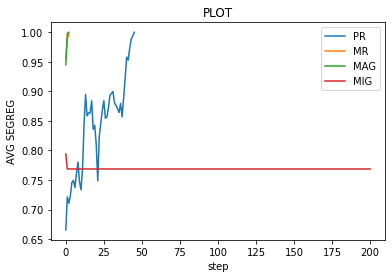

In [31]:
p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


plt.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
plt.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
plt.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
plt.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

plt.legend(loc='best')
plt.title('PLOT')
plt.ylabel('AVG SEGREG')
plt.xlabel('step')
plt.show()

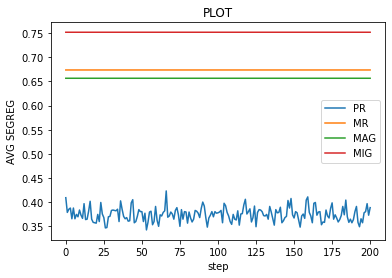

In [32]:
p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


plt.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
plt.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
plt.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
plt.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

plt.legend(loc='best')
plt.title('PLOT')
plt.ylabel('AVG SEGREG')
plt.xlabel('step')
plt.show()

In [ ]:
res = df2.groupby(["side"]).sum()[["elapsed_step_time"]]


plt.plot([0,1,2,3,4], [10,20,30,40,60],  label='side')
plt.plot([0,1,2], [100,200,500], label='step')
plt.legend(loc='best')
plt.title('PLOT')
plt.ylabel('side')
plt.xlabel('step')
plt.show()

In [10]:
#plt.plot(df[ (df["RunId"]==1) & (df["RunId"]==1) ]['segregation'], label='Training Loss')
res = df3.groupby(["side"]).sum()[["elapsed_step_time"]]
res

<ipython-input-10-568b00056d3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = df3.groupby(["side"]).sum()[["elapsed_step_time"]]


,elapsed_step_time
side,
8,31757.047672
15,504766.023674


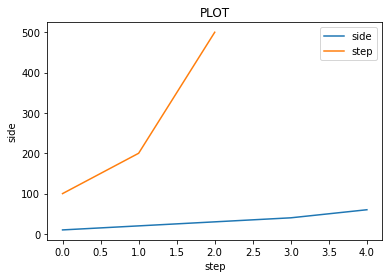

In [17]:
plt.plot([0,1,2,3,4], [10,20,30,40,60],  label='side')
plt.plot([0,1,2], [100,200,500], label='step')
plt.legend(loc='best')
plt.title('PLOT')
plt.ylabel('side')
plt.xlabel('step')
plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(df[ (df["RunId"]==1) & (df["RunId"]==1) ]['segregation'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss',  linestyle='dashed')


The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [7]:
model_vars = model.datacollector.get_model_vars_dataframe()

In [8]:
model_vars

,perc_happy,tot_seg_avg,num_agents_happy
0,0.500,0.406250,8
1,0.375,0.390625,6


Finally, we can plot the 'happy' series:

Total agents: 70


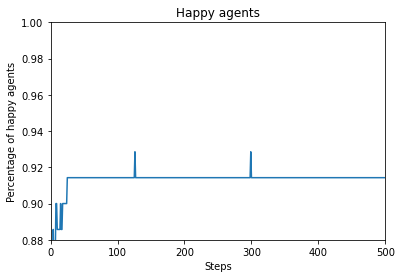

In [68]:
print("Total agents:", model.schedule.get_agent_count())


model_vars.perc_happy.plot()

plt.axis([0, 500, 0.88, 1])
plt.title("Happy agents")
plt.xlabel("Steps")
plt.ylabel("Percentage of happy agents")
plt.show()

Plot also total segregation in time

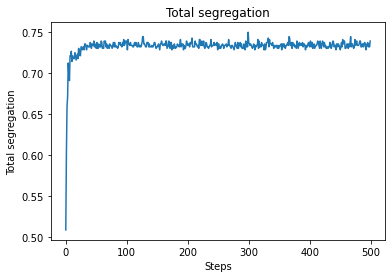

In [70]:
model_vars.tot_seg.plot()

plt.title("Total segregation")
plt.xlabel("Steps")
plt.ylabel("Total segregation")
plt.show()

For testing purposes, here is a table giving each agent's x and y values at each step.

In [9]:
agent_vars= model.datacollector.get_agent_vars_dataframe()

In [72]:
agent_vars.head()

x  y  segregation
Step AgentID                   
1    0        7  0         0.25
     1        0  3         0.50
     2        0  4         0.50
     3        0  5         0.50
     4        6  4         0.25

In [79]:
agent_vars.columns

Index(['x', 'y', 'segregation'], dtype='object')

In [82]:
agent_vars.loc[1] #accede su singoli step

,x,y,segregation
AgentID,,,
0,7,0,0.250
1,0,3,0.500
2,0,4,0.500
3,0,5,0.500
4,6,4,0.250
...,...,...,...
65,9,3,0.625
66,9,4,0.500
67,7,8,0.250


In [89]:
agent_vars.loc[1,0]

x              7.00
y              0.00
segregation    0.25
Name: (1, 0), dtype: float64

In [97]:
a = agent_vars.loc[1]
a.loc[0:3]

,x,y,segregation
AgentID,,,
0,7,0,0.25
1,0,3,0.50
2,0,4,0.50
3,0,5,0.50


Effect of Homophily on segregation
Now, we can do a parameter sweep to see how segregation changes with homophily.
First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [14]:
import numpy as np
import pandas as pd
from mesa.batchrunner import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [16]:
parameters = {"side": 10, "density": 0.8, "minority_pc": 0.2, 
              "homophily": np.arange(1/8,9/8,1/8)}

In [17]:
#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 10,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [01:25<00:00,  1.07s/it]


In [18]:
df = pd.DataFrame(results)
df

,RunId,iteration,Step,side,density,minority_pc,homophily,perc_happy,tot_seg,AgentID,x,y,segregation
0,0,0,0,10,0.8,0.2,0.125,0.886076,0.441456,NaN,NaN,NaN,NaN
1,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,0.0,0.0,0.0,0.375
2,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,1.0,0.0,1.0,0.375
3,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,2.0,0.0,3.0,0.125
4,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,3.0,0.0,4.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388576,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,76.0,1.0,6.0,1.000
2388577,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,77.0,4.0,6.0,0.625
2388578,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,78.0,6.0,7.0,0.250
2388579,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,79.0,5.0,5.0,0.375


For each value of homophily, we look at final total happiness

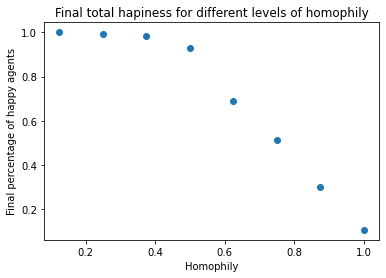

In [19]:
hom_iter = df.groupby(["homophily","iteration"]).max()[["perc_happy"]]
mean_happy = hom_iter.groupby("homophily").mean()["perc_happy"]

plt.scatter(np.arange(1/8,9/8,1/8),mean_happy)

plt.title("Final total hapiness for different levels of homophily")
plt.xlabel("Homophily")
plt.ylabel("Final percentage of happy agents")
plt.show()

We can look at no. of steps

In [20]:
df.groupby(["homophily"]).max()[["Step"]]

,Step
homophily,
0.125,6
0.250,500
0.375,500
0.500,500
0.625,500
0.750,500
0.875,500
1.000,500


We plot the mean (on 10 interations) of final segregation for evert homophily level

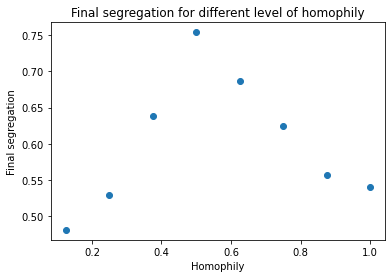

In [21]:
hom_iter = df.groupby(["homophily","iteration"]).max()[["tot_seg"]]
tot_seg = hom_iter.groupby("homophily").mean()["tot_seg"]

plt.scatter(np.arange(1/8,9/8,1/8),tot_seg)


plt.title("Final segregation for different level of homophily")
plt.xlabel("Homophily")
plt.ylabel("Final segregation")
plt.show()

We now have a look to segregation over steps for the highest level of homophily

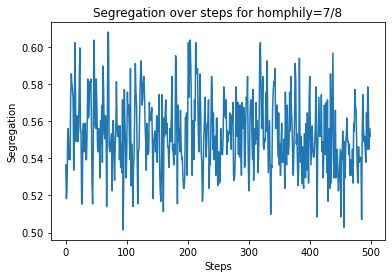

In [23]:
plt.plot(df[(df["AgentID"]==1) & (df["homophily"]==7/8) & (df["iteration"]==0)].reset_index()["tot_seg"])

plt.title("Segregation over steps for homphily=7/8")
plt.xlabel("Steps")
plt.ylabel("Segregation")
plt.show()

Now, we can do a parameter sweep to see how segregation changes with minority_pc

In [24]:
parameters = {"side": 10, "density": 0.8, "minority_pc": [.1,.2, .3,.4, .5], 
              "homophily": 0.3}

results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 10,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.22it/s]


In [25]:
df = pd.DataFrame(results)

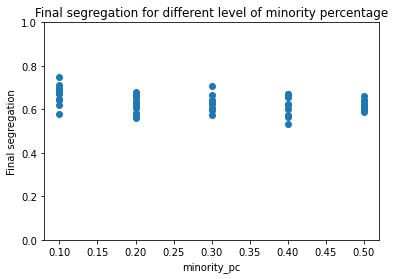

In [26]:
min_iter = df.groupby(["minority_pc","iteration"]).max()[["tot_seg"]]
min_iter
plt.scatter(np.repeat([.1,.2,.3,.4,.5],10),min_iter)


plt.title("Final segregation for different level of minority percentage")
plt.xlabel("minority_pc")
plt.ylabel("Final segregation")
plt.ylim(0, 1)

plt.show()

In [27]:
df.groupby(["minority_pc"]).max()[["Step"]]

,Step
minority_pc,
0.1,500
0.2,500
0.3,500
0.4,500
0.5,500


In [29]:
df.head()

,RunId,iteration,Step,side,density,minority_pc,homophily,perc_happy,tot_seg,AgentID,x,y,segregation
0,0,0,0,10,0.8,0.1,0.3,0.915663,0.671687,NaN,NaN,NaN,NaN
1,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,0.0,9.0,1.0,0.250
2,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,1.0,0.0,1.0,0.500
3,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,2.0,0.0,2.0,0.625
4,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,3.0,0.0,3.0,0.500


In [9]:
import pandas as pd
import numpy as np
d = pd.DataFrame(0, index=np.arange(10), columns=['x','y','happiness'])
d

,x,y,happiness
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [10]:
d.loc[(d["x"] == 0) & (d["y"] == 0), "happiness"] = 52
d

,x,y,happiness
0,0,0,52
1,0,0,52
2,0,0,52
3,0,0,52
4,0,0,52
5,0,0,52
6,0,0,52
7,0,0,52
8,0,0,52
9,0,0,52


In [11]:
d.iloc[0]['happiness'] = 1
d

,x,y,happiness
0,0,0,1
1,0,0,52
2,0,0,52
3,0,0,52
4,0,0,52
5,0,0,52
6,0,0,52
7,0,0,52
8,0,0,52
9,0,0,52


In [12]:
d.sort_values(by="happiness", inplace = True, ascending = False)
d.reset_index(inplace = True)
d

,index,x,y,happiness
0,1,0,0,52
1,2,0,0,52
2,3,0,0,52
3,4,0,0,52
4,5,0,0,52
5,6,0,0,52
6,7,0,0,52
7,8,0,0,52
8,9,0,0,52
9,0,0,0,1


In [13]:
d_happy = d[d["happiness"]>53]
d_happy.reset_index(inplace=True)
d_happy

,level_0,index,x,y,happiness


In [18]:
d_happy.empty

True